In [1]:
import os
import json
import time
import pyarrow

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# CNBC News

In [2]:
cnbc_df = pd.read_csv('../data/external/cnbc_news_dataset.csv')

In [3]:
cnbc_df.head()

,index,title,url,published_at,author,publisher,short_description,keywords,header_image,raw_description,description,scraped_at
0,0,Santoli’s Wednesday market notes: Could Septem...,https://www.cnbc.com/2021/09/29/santolis-wedne...,2021-09-29T17:09:39+0000,Michael Santoli,CNBC,"This is the daily notebook of Mike Santoli, CN...","cnbc, Premium, Articles, Investment strategy, ...",https://image.cnbcfm.com/api/v1/image/10694960...,"<div class=""group""><p><em>This is the daily no...","This is the daily notebook of Mike Santoli, CN...",2021-10-30 14:11:23.709372
1,1,My take on the early Brexit winners and losers,https://www.cnbc.com/2016/06/24/ian-bremmers-t...,2016-06-24T13:50:48-0400,NaN,CNBC,This commentary originally ran on Facebook. Bo...,"Articles, Politics, Europe News, European Cent...",https://fm.cnbc.com/applications/cnbc.com/reso...,NaN,NaN,2021-10-30 14:11:23.820139
2,2,Europe&#039;s recovery depends on Renzi&#039;s...,https://www.cnbc.com/2014/03/25/europes-recove...,2014-03-25T13:29:45-0400,NaN,CNBC,"In spring, ambitious reforms began in Italy. U...","Articles, Business News, Economy, Europe Econo...",https://fm.cnbc.com/applications/cnbc.com/reso...,NaN,NaN,2021-10-30 14:11:23.854710
3,3,US Moves Closer to Becoming A Major Shareholde...,https://www.cnbc.com/2009/04/22/us-moves-close...,2009-04-22T19:49:03+0000,Michelle Caruso-Cabrera,CNBC,The US government is increasingly likely to co...,"cnbc, Articles, General Motors Co, Business Ne...",https://image.cnbcfm.com/api/v1/image/24947979...,"<div class=""group""><p>The US government is inc...",The US government is increasingly likely to co...,2021-10-30 14:11:24.261143
4,4,Trump: 'Mission accomplished' on 'perfectly ex...,https://www.cnbc.com/2018/04/14/trump-mission-...,2018-04-14T14:59:04+0000,Javier E. David,CNBC,NaN,"cnbc, Articles, George W. Bush, Vladimir Putin...",https://image.cnbcfm.com/api/v1/image/10513177...,"<div class=""group""></div>,<div class=""group""><...",President Donald Trump hailed the U.S.-led int...,2021-10-30 14:11:24.489490


In [4]:
cnbc_df.shape

(625, 12)

In [5]:
sorted(cnbc_df['published_at'].apply(lambda x: int(x[:4])).unique())

[2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

# financial_news_headlines_data

## CNBC

In [6]:
cnbc_headlines_df = pd.read_csv('../data/external/financial_news_headlines_data/cnbc_headlines.csv')
cnbc_headlines_df.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."


In [7]:
cnbc_headlines_df.dropna().shape

(2800, 3)

In [8]:
sorted(cnbc_headlines_df['Time'].dropna().apply(lambda x: int(x[-4:])).unique())

[2017, 2018, 2019, 2020]

## Guardian

In [9]:
guardian_headlines_df = pd.read_csv('../data/external/financial_news_headlines_data/guardian_headlines.csv')
guardian_headlines_df.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [10]:
guardian_headlines_df.shape

(17800, 2)

## Reuters financial_dataeuters

In [11]:
reuters_headlines_df = pd.read_csv('../data/external/financial_news_headlines_data/reuters_headlines.csv')
reuters_headlines_df.head()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


In [12]:
reuters_headlines_df.shape

(32770, 3)

In [13]:
sorted(reuters_headlines_df['Time'].dropna().apply(lambda x: int(x[-4:])).unique())

[2018, 2019, 2020]

# financial_data

In [14]:
financial_data = pd.read_parquet('../data/external/financial_data.parquet.gzip')

In [15]:
financial_data.head()

,Headline,Journalists,Date,Link,Article
0,Exxon Mobil offers plan to end Alaska dispute,"b'[""Yereth Rosen""]'","Fri Oct 20, 2006 6:15pm EDT",http://www.reuters.com/article/2006/10/20/busi...,"ANCHORAGE, Alaska (Reuters) - Exxon Mobil ( X..."
1,"Hey buddy, can you spare $600 for a Google share?","b'[""Paul Thomasch"",""Eric Auchard""]'","Fri Oct 20, 2006 4:25pm EDT",http://www.reuters.com/article/2006/10/20/busi...,SAN FRANCISCO/NEW YORK (Reuters) - Wall Stree...
2,AOL CEO says sales may shrink for two years -p...,"b'[""""]'","Sat Oct 21, 2006 2:21pm EDT",http://www.reuters.com/article/2006/10/21/busi...,FRANKFURT (Reuters) - Internet service provid...
3,"Fed to keep hawkish tone, hold rates steady","b'[""Alister Bull""]'","Sun Oct 22, 2006 12:14pm EDT",http://www.reuters.com/article/2006/10/22/busi...,WASHINGTON (Reuters) - The central bank is ex...
4,Pluspetrol says losing $2.4 mln/day in Peru pr...,"b'[""""]'","Sat Oct 21, 2006 8:11pm EDT",http://www.reuters.com/article/2006/10/22/busi...,"LIMA, Peru (Reuters) - Argentine oil company ..."


In [16]:
financial_data.loc[0, 'Article']

'ANCHORAGE, Alaska  (Reuters) - Exxon Mobil ( XOM.N ) offeredto pay a $20 million fine and relinquish some leases to thestate of Alaska to resolve a dispute over a North Slope oil andgas field that has remained undeveloped for decades, accordingto a letter made public on Friday.In a proposal sent earlier this week to the AlaskaDepartment of Natural Resources, Exxon Mobil offered to pay thefine and surrender about 20,000 acres of the 116,000-acre PointThomson unit for failure to develop the field as quickly aspromised.  The company\'s offer was accompanied by an updated plan thatlinks future field development to a yet-to-be-built pipelinethat would ship North Slope natural gas to the lower 48 U.S.states. The natural gas pipeline, a massive project estimatedto cost over $20 billion, is expected to take years to build.  "We believe this approach is in the best interest of theState and the PTU (Point Thomson Unit) Owners," wrote RichardOwen, Alaska production manager for Exxon Mobil.  Poin

In [17]:
financial_data.shape

(106494, 5)

In [18]:
sorted(pd.to_datetime(financial_data['Date']).dt.strftime('%Y').unique())

/home/ec2-user/environments/styx_env/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/tmp/ipykernel_4533/1673580740.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sorted(pd.to_datetime(financial_data['Date']).dt.strftime('%Y').unique())


['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']

# us_financial_news_articles

In [17]:
def parse_json(json_file):
    new_data = {}
    
    for key, value in json_file.items():
        if key == 'thread':
            for key_2, value_2 in json_file['thread'].items():
                if key_2 in thread:
                    new_data[key_2] = value_2
        else:
            if key in first_lvl:
                if key != 'entities':
                    new_data[key] = value
                else:
                    for key_3, value_3 in json_file['entities'].items():
                        new_data[key_3] = value_3
    return new_data

In [18]:
directory_path = "../data/external/us_financial_news_articles"

In [19]:
subdirs = sorted(os.listdir(directory_path))[1:-1]
subdirs

['2018_01_112b52537b67659ad3609a234388c50a',
 '2018_02_112b52537b67659ad3609a234388c50a',
 '2018_03_112b52537b67659ad3609a234388c50a',
 '2018_04_112b52537b67659ad3609a234388c50a',
 '2018_05_112b52537b67659ad3609a234388c50a']

## folder_1

In [20]:
subdir = subdirs[0]
subdir

'2018_01_112b52537b67659ad3609a234388c50a'

In [21]:
sample = os.listdir(os.path.join(directory_path, subdir))[0]
sample

'news_0000258.json'

In [22]:
one_sample = json.load(
    open(os.path.join(directory_path, subdir, sample)))
one_sample

{'organizations': [],
 'uuid': 'd68e0728c68ad7ddc8eceeb49b413c800209e064',
 'thread': {'social': {'gplus': {'shares': 0},
   'pinterest': {'shares': 0},
   'vk': {'shares': 0},
   'linkedin': {'shares': 0},
   'facebook': {'likes': 0, 'shares': 0, 'comments': 0},
   'stumbledupon': {'shares': 0}},
  'site_full': 'www.cnbc.com',
  'main_image': '//sc.cnbcfm.com/applications/cnbc.com/staticcontent/img/cnbc_logo.gif',
  'site_section': 'http://www.cnbc.com/id/10000027',
  'section_title': 'Press Releases - CNBC',
  'url': 'http://www.cnbc.com/2018/01/03/business-wire-avx-corporation-announces-a-definitive-agreement-to-acquire-ethertronics.html',
  'country': 'US',
  'domain_rank': 767,
  'title': 'AVX Corporation Announces a Definitive Agreement to Acquire Ethertronics',
  'performance_score': 0,
  'site': 'cnbc.com',
  'participants_count': 1,
  'title_full': '',
  'spam_score': 0.058,
  'site_type': 'news',
  'published': '2018-01-03T17:00:00.000+02:00',
  'replies_count': 0,
  'uuid': 

In [23]:
first_lvl = ['text', 'published', 'entities', 'title', 'url', 'author']
thread = ['title_full', 'country', 'section_title', 'site']

parse_json(one_sample)

{'section_title': 'Press Releases - CNBC',
 'country': 'US',
 'site': 'cnbc.com',
 'title_full': '',
 'author': 'cnbc.com',
 'url': 'http://www.cnbc.com/2018/01/03/business-wire-avx-corporation-announces-a-definitive-agreement-to-acquire-ethertronics.html',
 'title': 'AVX Corporation Announces a Definitive Agreement to Acquire Ethertronics',
 'persons': [{'name': 'john sarvis', 'sentiment': 'none'}],
 'locations': [{'name': 's.c.', 'sentiment': 'none'}],
 'organizations': [{'name': 'avx', 'sentiment': 'negative'},
  {'name': 'avx corporation', 'sentiment': 'negative'},
  {'name': 'nyse', 'sentiment': 'negative'},
  {'name': 'ethertronics inc.', 'sentiment': 'none'},
  {'name': 'ethertronics', 'sentiment': 'none'}],
 'text': 'FOUNTAIN INN, S.C.--(BUSINESS WIRE)-- AVX Corporation (NYSE: AVX) today announced that it has signed a definitive agreement to acquire Ethertronics Inc., a privately held manufacturer of passive and active antenna systems. Ethertronics is a leader in advanced anten

In [24]:
%%time
data = []
for filename in os.listdir(os.path.join(directory_path, subdir)):
    if filename.endswith(".json"):
        with open(os.path.join(directory_path, subdir, filename), "r") as json_file:
            json_data = parse_json(json.load(json_file))
            data.append(json_data)

us_financial_news = pd.DataFrame(data)

CPU times: user 4.61 s, sys: 990 ms, total: 5.6 s
Wall time: 10.4 s


In [25]:
us_financial_news.shape

(57802, 12)

In [26]:
us_financial_news.head()

,section_title,country,site,title_full,author,url,title,persons,locations,organizations,text,published
0,Press Releases - CNBC,US,cnbc.com,,cnbc.com,http://www.cnbc.com/2018/01/03/business-wire-a...,AVX Corporation Announces a Definitive Agreeme...,"[{'name': 'john sarvis', 'sentiment': 'none'}]","[{'name': 's.c.', 'sentiment': 'none'}]","[{'name': 'avx', 'sentiment': 'negative'}, {'n...","FOUNTAIN INN, S.C.--(BUSINESS WIRE)-- AVX Corp...",2018-01-03T17:00:00.000+02:00
1,"Archive News &amp; Video for Friday, 12 Jan 20...",US,reuters.com,,Reuters Editorial,https://www.reuters.com/article/brief-wemade-e...,BRIEF-Wemade Entertainment to dispose treasury...,[],[],"[{'name': 'reuters', 'sentiment': 'negative'},...",Jan 12 (Reuters) - Wemade Entertainment Co Ltd...,2018-01-12T17:09:00.000+02:00
2,California,US,cnbc.com,,cnbc.com,https://www.cnbc.com/2018/01/09/reuters-americ...,Sprouts signs on with Instacart as U.S. grocer...,"[{'name': 'instacart', 'sentiment': 'negative'}]","[{'name': 'u.s.', 'sentiment': 'none'}, {'name...","[{'name': 'reuters', 'sentiment': 'negative'},...","LOS ANGELES, Jan 9 (Reuters) - U.S. healthy fo...",2018-01-09T20:25:00.000+02:00
3,Reuters: Sports News,US,reuters.com,,,https://uk.reuters.com/article/uk-motor-f1-wil...,Sirotkin to partner Stroll at Williams F1 team,"[{'name': 'stroll', 'sentiment': 'negative'}, ...","[{'name': 'barcelona-catalunya', 'sentiment': ...","[{'name': 'williams f1', 'sentiment': 'negativ...","January 16, 2018 / 11:46 AM / Updated 7 hours ...",2018-01-16T13:46:00.000+02:00
4,Barack Obama,US,cnbc.com,,cnbc.com,https://www.cnbc.com/2018/01/21/the-associated...,The Latest: Ryan: Democrats should vote for sh...,"[{'name': 'ryan', 'sentiment': 'negative'}, {'...","[{'name': 'washington', 'sentiment': 'none'}, ...","[{'name': 'ap', 'sentiment': 'negative'}, {'na...",WASHINGTON (AP) — The Latest on the government...,2018-01-21T16:22:00.000+02:00


In [27]:
us_financial_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57802 entries, 0 to 57801
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   section_title  57802 non-null  object
 1   country        57802 non-null  object
 2   site           57802 non-null  object
 3   title_full     57802 non-null  object
 4   author         57802 non-null  object
 5   url            57802 non-null  object
 6   title          57802 non-null  object
 7   persons        57802 non-null  object
 8   locations      57802 non-null  object
 9   organizations  57802 non-null  object
 10  text           57802 non-null  object
 11  published      57802 non-null  object
dtypes: object(12)
memory usage: 5.3+ MB


In [28]:
us_financial_news['country'].value_counts()

country
US    57802
Name: count, dtype: int64

In [29]:
us_financial_news['site'].value_counts()

site
reuters.com    37262
cnbc.com       16019
wsj.com         3412
fortune.com     1109
Name: count, dtype: int64

## folder_2

In [30]:
subdir = subdirs[1]
subdir

'2018_02_112b52537b67659ad3609a234388c50a'

In [31]:
sample = os.listdir(os.path.join(directory_path, subdir))[0]
sample

'news_0000258.json'

In [32]:
one_sample = json.load(
    open(os.path.join(directory_path, subdir, sample)))
one_sample

{'organizations': [],
 'uuid': '1edfbf8431b578433ff52b36f899ae153a0939e3',
 'thread': {'social': {'gplus': {'shares': 0},
   'pinterest': {'shares': 0},
   'vk': {'shares': 0},
   'linkedin': {'shares': 0},
   'facebook': {'likes': 0, 'shares': 0, 'comments': 0},
   'stumbledupon': {'shares': 0}},
  'site_full': 'www.reuters.com',
  'main_image': 'https://s4.reutersmedia.net/resources_v2/images/rcom-default.png',
  'site_section': 'http://www.reuters.com/resources/archive/us/20180201.html',
  'section_title': 'Archive News &amp; Video for Thursday, 01 Feb 2018 | Reuters.com',
  'url': 'https://www.reuters.com/article/brief-alaska-air-group-names-david-oppen/brief-alaska-air-group-names-david-oppenheim-as-vice-president-of-sales-idUSFWN1PR108',
  'country': 'US',
  'domain_rank': 408,
  'title': 'BRIEF-Alaska Air Group Names David Oppenheim As Vice President Of Sales',
  'performance_score': 0,
  'site': 'reuters.com',
  'participants_count': 1,
  'title_full': '',
  'spam_score': 0.789

In [33]:
first_lvl = ['text', 'published', 'entities', 'title', 'url', 'author']
thread = ['title_full', 'country', 'section_title', 'site']

parse_json(one_sample)

{'section_title': 'Archive News &amp; Video for Thursday, 01 Feb 2018 | Reuters.com',
 'country': 'US',
 'site': 'reuters.com',
 'title_full': '',
 'author': 'Reuters Editorial',
 'url': 'https://www.reuters.com/article/brief-alaska-air-group-names-david-oppen/brief-alaska-air-group-names-david-oppenheim-as-vice-president-of-sales-idUSFWN1PR108',
 'title': 'BRIEF-Alaska Air Group Names David Oppenheim As Vice President Of Sales',
 'persons': [{'name': 'david oppenheim', 'sentiment': 'negative'}],
 'locations': [],
 'organizations': [{'name': 'brief-alaska air group', 'sentiment': 'negative'},
  {'name': 'reuters) - alaska air group inc', 'sentiment': 'neutral'},
  {'name': 'eikon', 'sentiment': 'none'}],
 'text': 'Feb 1 (Reuters) - Alaska Air Group Inc:\n* ALASKA AIR GROUP - HAS NAMED DAVID OPPENHEIM AS VICE PRESIDENT OF SALES Source text for Eikon: Further company coverage:\n ',
 'published': '2018-02-01T21:30:00.000+02:00'}

In [34]:
%%time
data = []
for filename in os.listdir(os.path.join(directory_path, subdir)):
    if filename.endswith(".json"):
        with open(os.path.join(directory_path, subdir, filename), "r") as json_file:
            json_data = parse_json(json.load(json_file))
            data.append(json_data)

us_financial_news = pd.DataFrame(data)

CPU times: user 5.18 s, sys: 1.07 s, total: 6.25 s
Wall time: 13.5 s


In [22]:
us_financial_news.shape

(64592, 12)

In [23]:
us_financial_news.head()

,section_title,country,site,title_full,author,url,title,persons,locations,organizations,text,published
0,,US,cnbc.com,,Jeff Cox,https://www.cnbc.com/2018/02/21/fed-quarles-pu...,"Fed Quarles pushes for rate hikes, review of c...","[{'name': 'fed quarles', 'sentiment': 'negativ...",[],[{'name': 'jb reed | bloomberg | getty images ...,Fed Governor Randal Quarles said Thursday that...,2018-02-22T07:16:00.000+02:00
1,Reuters: Top News,US,reuters.com,,,https://uk.reuters.com/article/uk-italy-macera...,Italy's League under pressure over racist shoo...,"[{'name': 'matteo salvini', 'sentiment': 'none...","[{'name': 'italy', 'sentiment': 'none'}, {'nam...","[{'name': 'league', 'sentiment': 'negative'}, ...","February 4, 2018 / 1:49 PM / Updated 18 minute...",2018-02-04T15:49:00.000+02:00
2,"Archive News &amp; Video for Tuesday, 20 Feb 2...",US,reuters.com,,Reuters Editorial,https://www.reuters.com/article/brief-hiq-inte...,BRIEF-HiQ International ‍Board Proposes Share ...,[],[],"[{'name': 'reuters', 'sentiment': 'negative'},...",Feb 20 (Reuters) - HIQ INTERNATIONAL AB:\n* ‍B...,2018-02-20T15:34:00.000+02:00
3,"Archive News &amp; Video for Friday, 16 Feb 20...",US,reuters.com,,Reuters Editorial,https://www.reuters.com/article/us-music-drake...,Drake gives away almost $1 million in 'God's P...,"[{'name': 'drake', 'sentiment': 'negative'}, {...","[{'name': 'florida', 'sentiment': 'none'}, {'n...","[{'name': 'reuters', 'sentiment': 'negative'},...",LOS ANGELES (Reuters) - The song is called “Go...,2018-02-17T06:36:00.000+02:00
4,,US,cnbc.com,,Cheang Ming,https://www.cnbc.com/2018/02/11/stock-market-p...,Stock market pre-markets data: Dow futures aft...,"[{'name': 'jonathan krinsky', 'sentiment': 'no...","[{'name': 'new york', 'sentiment': 'none'}, {'...","[{'name': 'new york stock exchange', 'sentimen...",U.S. stock index futures pointed to a solid op...,2018-02-12T03:49:00.000+02:00


In [24]:
us_financial_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64592 entries, 0 to 64591
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   section_title  64592 non-null  object
 1   country        64592 non-null  object
 2   site           64592 non-null  object
 3   title_full     64592 non-null  object
 4   author         64592 non-null  object
 5   url            64592 non-null  object
 6   title          64592 non-null  object
 7   persons        64592 non-null  object
 8   locations      64592 non-null  object
 9   organizations  64592 non-null  object
 10  text           64592 non-null  object
 11  published      64592 non-null  object
dtypes: object(12)
memory usage: 5.9+ MB


In [25]:
us_financial_news['country'].value_counts()

US    64592
Name: country, dtype: int64

In [26]:
us_financial_news['site'].value_counts()

reuters.com    44438
cnbc.com       15976
wsj.com         3185
fortune.com      993
Name: site, dtype: int64

## folder_3

In [27]:
subdir = subdirs[2]
subdir

'2018_03_112b52537b67659ad3609a234388c50a'

In [28]:
sample = os.listdir(os.path.join(directory_path, subdir))[0]
sample

'news_0047188.json'

In [29]:
one_sample = json.load(
    open(os.path.join(directory_path, subdir, sample)))
one_sample

{'organizations': [],
 'uuid': '4e41266ca1707a052245161948413f057982c0b2',
 'thread': {'social': {'gplus': {'shares': 0},
   'pinterest': {'shares': 0},
   'vk': {'shares': 0},
   'linkedin': {'shares': 0},
   'facebook': {'likes': 0, 'shares': 0, 'comments': 0},
   'stumbledupon': {'shares': 0}},
  'site_full': 'www.reuters.com',
  'main_image': 'https://s4.reutersmedia.net/resources_v2/images/rcom-default.png',
  'site_section': 'http://www.reuters.com/resources/archive/us/20180327.html',
  'section_title': 'Archive News &amp; Video for Tuesday, 27 Mar 2018 | Reuters.com',
  'url': 'https://www.reuters.com/article/brief-au-optronics-to-pay-cash-dividend/brief-au-optronics-to-pay-cash-dividend-of-t1-2-share-for-2017-idUSL3N1R953C',
  'country': 'US',
  'domain_rank': 408,
  'title': 'BRIEF-AU Optronics to pay cash dividend of T$1.2/share for 2017',
  'performance_score': 0,
  'site': 'reuters.com',
  'participants_count': 1,
  'title_full': '',
  'spam_score': 0.005,
  'site_type': 'n

In [30]:
first_lvl = ['text', 'published', 'entities', 'title', 'url', 'author']
thread = ['title_full', 'country', 'section_title', 'site']

parse_json(one_sample)

{'section_title': 'Archive News &amp; Video for Tuesday, 27 Mar 2018 | Reuters.com',
 'country': 'US',
 'site': 'reuters.com',
 'title_full': '',
 'author': 'Reuters Editorial',
 'url': 'https://www.reuters.com/article/brief-au-optronics-to-pay-cash-dividend/brief-au-optronics-to-pay-cash-dividend-of-t1-2-share-for-2017-idUSL3N1R953C',
 'title': 'BRIEF-AU Optronics to pay cash dividend of T$1.2/share for 2017',
 'persons': [],
 'locations': [],
 'organizations': [{'name': 'au optronics corp', 'sentiment': 'negative'},
  {'name': 'reuters', 'sentiment': 'negative'},
  {'name': 'brief-au optronics', 'sentiment': 'negative'},
  {'name': 'beijing headline news', 'sentiment': 'none'}],
 'text': 'March 27(Reuters) - AU Optronics Corp :\n* Says it plans to pay cash dividend of T$1.2/share for 2017\nSource text in Chinese: goo.gl/uxuxci\nFurther company coverage: (Beijing Headline News)\n ',
 'published': '2018-03-27T22:14:00.000+03:00'}

In [31]:
data = []
for filename in os.listdir(os.path.join(directory_path, subdir)):
    if filename.endswith(".json"):
        with open(os.path.join(directory_path, subdir, filename), "r") as json_file:
            json_data = parse_json(json.load(json_file))
            data.append(json_data)

us_financial_news = pd.DataFrame(data)

In [32]:
us_financial_news.shape

(57456, 12)

In [33]:
us_financial_news.head()

,section_title,country,site,title_full,author,url,title,persons,locations,organizations,text,published
0,"Archive News &amp; Video for Tuesday, 27 Mar 2...",US,reuters.com,,Reuters Editorial,https://www.reuters.com/article/brief-au-optro...,BRIEF-AU Optronics to pay cash dividend of T$1...,[],[],"[{'name': 'au optronics corp', 'sentiment': 'n...",March 27(Reuters) - AU Optronics Corp :\n* Say...,2018-03-27T22:14:00.000+03:00
1,Reuters: Top News,US,reuters.com,,,https://uk.reuters.com/article/uk-britain-econ...,British stats watchdog - stop using RPI inflat...,"[{'name': 'david n', 'sentiment': 'none'}]","[{'name': 'oxford street', 'sentiment': 'none'...","[{'name': 'reuters staff', 'sentiment': 'none'...","March 8, 2018 / 1:35 PM / Updated an hour ago ...",2018-03-08T15:42:00.000+02:00
2,Reuters Video: Latest Videos IN,US,reuters.com,,,https://in.reuters.com/video/2018/03/23/dropbo...,Dropbox shares surge in IPO,"[{'name': 'fred katayama', 'sentiment': 'none'}]",[],"[{'name': 'ipo dropbox', 'sentiment': 'negativ...","Dropbox shares surge in IPO Saturday, March 24...",2018-03-23T22:23:00.000+03:00
3,Reuters: People News,US,reuters.com,,Reuters Editorial,https://www.reuters.com/article/us-germany-naz...,Bookkeeper of Auschwitz dies before starting s...,"[{'name': 'oskar groening', 'sentiment': 'none...","[{'name': 'auschwitz', 'sentiment': 'none'}, {...","[{'name': 'reuters', 'sentiment': 'negative'},...",BERLIN (Reuters) - The man known as the “bookk...,2018-03-13T01:05:00.000+02:00
4,CNBC International – World Business News Leader,US,cnbc.com,,Alexandra Gibbs,https://www.cnbc.com/2018/03/05/us-stock-futur...,US stocks set for a negative open as trade war...,"[{'name': 'donald trump', 'sentiment': 'none'}...","[{'name': 'u.s.', 'sentiment': 'none'}, {'name...","[{'name': 's&p', 'sentiment': 'none'}]",Dow closes 336 points higher as trade-war worr...,2018-03-05T13:27:00.000+02:00


In [34]:
us_financial_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57456 entries, 0 to 57455
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   section_title  57456 non-null  object
 1   country        57456 non-null  object
 2   site           57456 non-null  object
 3   title_full     57456 non-null  object
 4   author         57456 non-null  object
 5   url            57456 non-null  object
 6   title          57456 non-null  object
 7   persons        57456 non-null  object
 8   locations      57456 non-null  object
 9   organizations  57456 non-null  object
 10  text           57456 non-null  object
 11  published      57456 non-null  object
dtypes: object(12)
memory usage: 5.3+ MB


In [35]:
us_financial_news['country'].value_counts()

US    57456
Name: country, dtype: int64

In [36]:
us_financial_news['site'].value_counts()

reuters.com    36224
cnbc.com       16420
wsj.com         3638
fortune.com     1174
Name: site, dtype: int64

## folder_4

In [37]:
subdir = subdirs[3]
subdir

'2018_04_112b52537b67659ad3609a234388c50a'

In [38]:
sample = os.listdir(os.path.join(directory_path, subdir))[0]
sample

'news_0047188.json'

In [39]:
one_sample = json.load(
    open(os.path.join(directory_path, subdir, sample)))
one_sample

{'organizations': [],
 'uuid': '9da3ab75c6bcf5c83b8fbbdaf42b6047ddd19907',
 'thread': {'social': {'gplus': {'shares': 0},
   'pinterest': {'shares': 0},
   'vk': {'shares': 0},
   'linkedin': {'shares': 0},
   'facebook': {'likes': 0, 'shares': 0, 'comments': 0},
   'stumbledupon': {'shares': 0}},
  'site_full': 'uk.reuters.com',
  'main_image': 'https://s4.reutersmedia.net/resources/r/?d=20180423&i=OV8CNGMEZ&w=1200&r=OV8CNGMEZ&t=2',
  'site_section': 'http://feeds.reuters.com/reuters/UKVideoSportsAndLeisure',
  'section_title': 'Reuters Video: Sports and Leisure',
  'url': 'https://uk.reuters.com/video/2018/04/23/mo-salah-wins-pfa-player-of-the-year-awa?videoId=420467373',
  'country': 'US',
  'domain_rank': 408,
  'title': 'Mo Salah wins PFA player of the year award',
  'performance_score': 0,
  'site': 'reuters.com',
  'participants_count': 0,
  'title_full': '',
  'spam_score': 0.0,
  'site_type': 'news',
  'published': '2018-04-23T12:35:00.000+03:00',
  'replies_count': 0,
  'uuid

In [40]:
first_lvl = ['text', 'published', 'entities', 'title', 'url', 'author']
thread = ['title_full', 'country', 'section_title', 'site']

parse_json(one_sample)

{'section_title': 'Reuters Video: Sports and Leisure',
 'country': 'US',
 'site': 'reuters.com',
 'title_full': '',
 'author': '',
 'url': 'https://uk.reuters.com/video/2018/04/23/mo-salah-wins-pfa-player-of-the-year-awa?videoId=420467373',
 'title': 'Mo Salah wins PFA player of the year award',
 'persons': [{'name': 'mo salah', 'sentiment': 'negative'}],
 'locations': [],
 'organizations': [{'name': 'pfa', 'sentiment': 'negative'},
  {'name': 'reuters news agency | brand attribution guidelines | careers  reuters',
   'sentiment': 'none'},
  {'name': 'reuters.com', 'sentiment': 'none'},
  {'name': 'thomson reuters', 'sentiment': 'none'},
  {'name': 'reuters tv', 'sentiment': 'none'},
  {'name': 'reuters', 'sentiment': 'none'}],
 'text': "Mo Salah wins PFA player of the year award 10:35am BST - 01:17 Sat, 21 Apr, 2018 - (1:34) Featured Videos Thu, 23 Nov, 2017 - (2:18) Follow Reuters: Reuters Plus | Reuters News Agency | Brand Attribution Guidelines | Careers \nReuters, the news and med

In [41]:
data = []
for filename in os.listdir(os.path.join(directory_path, subdir)):
    if filename.endswith(".json"):
        with open(os.path.join(directory_path, subdir, filename), "r") as json_file:
            json_data = parse_json(json.load(json_file))
            data.append(json_data)

us_financial_news = pd.DataFrame(data)

In [42]:
us_financial_news.shape

(63245, 12)

In [43]:
us_financial_news.head()

,section_title,country,site,title_full,author,url,title,persons,locations,organizations,text,published
0,Reuters Video: Sports and Leisure,US,reuters.com,,,https://uk.reuters.com/video/2018/04/23/mo-sal...,Mo Salah wins PFA player of the year award,"[{'name': 'mo salah', 'sentiment': 'negative'}]",[],"[{'name': 'pfa', 'sentiment': 'negative'}, {'n...",Mo Salah wins PFA player of the year award 10:...,2018-04-23T12:35:00.000+03:00
1,Reuters: Motor Sports News,US,reuters.com,,,https://uk.reuters.com/article/uk-motor-f1-bah...,Motor racing-Mercedes look to China after losi...,"[{'name': 'vettel', 'sentiment': 'none'}, {'na...","[{'name': 'china', 'sentiment': 'none'}, {'nam...","[{'name': 'mercedes', 'sentiment': 'negative'}...","April 9, 2018 / 3:17 PM / a few seconds ago Mo...",2018-04-09T17:52:00.000+03:00
2,"Archive News &amp; Video for Thursday, 19 Apr ...",US,reuters.com,,Reuters Editorial,https://www.reuters.com/article/telecomitalia-...,URGENT-Hedge fund Elliott issues new attack on...,"[{'name': 'elliott', 'sentiment': 'negative'},...","[{'name': 'paris', 'sentiment': 'none'}]","[{'name': 'reuters', 'sentiment': 'negative'},...","PARIS, April 19 (Reuters) - Activist Elliott A...",2018-04-19T14:17:00.000+03:00
3,Reuters: Money News,US,reuters.com,,,https://in.reuters.com/article/pennsylvania-ai...,U.S. FAA to order inspections of jet engines a...,"[{'name': 'alwyn scott', 'sentiment': 'none'},...","[{'name': 'u.s.', 'sentiment': 'none'}, {'name...","[{'name': 'southwest', 'sentiment': 'negative'...",(Reuters) - The U.S. Federal Aviation Administ...,2018-04-19T17:56:00.000+03:00
4,"Archive News &amp; Video for Tuesday, 10 Apr 2...",US,reuters.com,,Reuters Editorial,https://www.reuters.com/article/givaudan-resul...,"Givaudan Q1 sales rise 5.4 pct, helped by new ...","[{'name': 'givaudan', 'sentiment': 'none'}, {'...","[{'name': 'zurich', 'sentiment': 'none'}]","[{'name': 'reuters', 'sentiment': 'negative'},...","ZURICH, April 10 (Reuters) - Fragrance and fla...",2018-04-10T13:06:00.000+03:00


In [44]:
us_financial_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63245 entries, 0 to 63244
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   section_title  63245 non-null  object
 1   country        63245 non-null  object
 2   site           63245 non-null  object
 3   title_full     63245 non-null  object
 4   author         63245 non-null  object
 5   url            63245 non-null  object
 6   title          63245 non-null  object
 7   persons        63245 non-null  object
 8   locations      63245 non-null  object
 9   organizations  63245 non-null  object
 10  text           63245 non-null  object
 11  published      63245 non-null  object
dtypes: object(12)
memory usage: 5.8+ MB


In [45]:
us_financial_news['country'].value_counts()

US    63245
Name: country, dtype: int64

In [46]:
us_financial_news['site'].value_counts()

reuters.com    41354
cnbc.com       16974
wsj.com         3739
fortune.com     1178
Name: site, dtype: int64

## folder_5

In [47]:
subdir = subdirs[4]
subdir

'2018_05_112b52537b67659ad3609a234388c50a'

In [48]:
sample = os.listdir(os.path.join(directory_path, subdir))[0]
sample

'news_0047188.json'

In [49]:
one_sample = json.load(
    open(os.path.join(directory_path, subdir, sample)))
one_sample

{'organizations': [],
 'uuid': '14409fed692eebe106cb550605419e6352675265',
 'thread': {'social': {'gplus': {'shares': 0},
   'pinterest': {'shares': 0},
   'vk': {'shares': 0},
   'linkedin': {'shares': 0},
   'facebook': {'likes': 0, 'shares': 0, 'comments': 0},
   'stumbledupon': {'shares': 0}},
  'site_full': 'www.cnbc.com',
  'main_image': 'https://fm.cnbc.com/applications/cnbc.com/resources/img/editorial/2018/05/25/105232825-makeit_05252018_Gloversuperstar_mezz.600x400.jpg',
  'site_section': 'http://www.cnbc.com/id/100004038/device/rss/rss.html',
  'section_title': 'Latest Video',
  'url': 'https://www.cnbc.com/video/2018/05/25/solo-star-donald-glover-from-youtube-comic-to-star-wars.html',
  'country': 'US',
  'domain_rank': 767,
  'title': 'How ‘Solo’ star Donald Glover (aka Childish Gambino) went from YouTube comic to ‘Star Wars’',
  'performance_score': 0,
  'site': 'cnbc.com',
  'participants_count': 0,
  'title_full': '',
  'spam_score': 0.0,
  'site_type': 'news',
  'publis

In [50]:
first_lvl = ['text', 'published', 'entities', 'title', 'url', 'author']
thread = ['title_full', 'country', 'section_title', 'site']

parse_json(one_sample)

{'section_title': 'Latest Video',
 'country': 'US',
 'site': 'cnbc.com',
 'title_full': '',
 'author': '',
 'url': 'https://www.cnbc.com/video/2018/05/25/solo-star-donald-glover-from-youtube-comic-to-star-wars.html',
 'title': 'How ‘Solo’ star Donald Glover (aka Childish Gambino) went from YouTube comic to ‘Star Wars’',
 'persons': [{'name': 'donald glover', 'sentiment': 'negative'},
  {'name': 'lando calrissian', 'sentiment': 'none'},
  {'name': 'tina fey', 'sentiment': 'none'}],
 'locations': [],
 'organizations': [],
 'text': 'How ‘Solo’ star Donald Glover (aka Childish Gambino) went from YouTube comic to ‘Star Wars’ 13 Mins Ago Before Donald Glover (also known as Childish Gambino) played Lando Calrissian in the new "Star Wars" movie, he was making viral YouTube comedy videos that caught Tina Fey\'s attention.',
 'published': '2018-05-25T22:15:00.000+03:00'}

In [51]:
data = []
for filename in os.listdir(os.path.join(directory_path, subdir)):
    if filename.endswith(".json"):
        with open(os.path.join(directory_path, subdir, filename), "r") as json_file:
            json_data = parse_json(json.load(json_file))
            data.append(json_data)

us_financial_news = pd.DataFrame(data)

In [52]:
us_financial_news.shape

(63147, 12)

In [53]:
us_financial_news.head()

,section_title,country,site,title_full,author,url,title,persons,locations,organizations,text,published
0,Latest Video,US,cnbc.com,,,https://www.cnbc.com/video/2018/05/25/solo-sta...,How ‘Solo’ star Donald Glover (aka Childish Ga...,"[{'name': 'donald glover', 'sentiment': 'negat...",[],[],How ‘Solo’ star Donald Glover (aka Childish Ga...,2018-05-25T22:15:00.000+03:00
1,"Archive News &amp; Video for Friday, 04 May 20...",US,reuters.com,,Reuters Editorial,https://www.reuters.com/article/russia-funds/r...,Russia's National Wealth Fund at $63.91 bln as...,"[{'name': 'darya korsunskaya', 'sentiment': 'n...","[{'name': 'russia', 'sentiment': 'none'}, {'na...","[{'name': 'reuters', 'sentiment': 'negative'},...","MOSCOW, May 4 (Reuters) - Russia’s National We...",2018-05-04T23:03:00.000+03:00
2,"Archive News &amp; Video for Wednesday, 16 May...",US,reuters.com,,Reuters Editorial,https://www.reuters.com/article/sweden-housepr...,Swedish apartment prices fell 7 pct Feb-April ...,"[{'name': 'johan sennero', 'sentiment': 'none'...","[{'name': 'maklarstatistik stockholm', 'sentim...","[{'name': 'reuters', 'sentiment': 'negative'},...","STOCKHOLM, May 16(Reuters) - Swedish apartment...",2018-05-16T12:02:00.000+03:00
3,Press Releases - CNBC,US,cnbc.com,,cnbc.com,http://www.cnbc.com/2018/05/16/business-wire-o...,Onxeo Provides Business Update and Reports Fir...,"[{'name': 'judith greciet', 'sentiment': 'none'}]","[{'name': 'copenhagen', 'sentiment': 'none'}, ...","[{'name': 'company', 'sentiment': 'none'}, {'n...","Development of lead product candidate, AsiDNA™...",2018-05-16T20:00:00.000+03:00
4,"Archive News &amp; Video for Monday, 07 May 20...",US,reuters.com,,Reuters Editorial,https://www.reuters.com/article/brief-cpt-tech...,CPT Technology Group's April Consolidated Reve...,[],"[{'name': 'hong kong', 'sentiment': 'none'}]","[{'name': 'reuters', 'sentiment': 'negative'},...",May 7 (Reuters) - CPT Technology Group Co Ltd:...,2018-05-07T18:04:00.000+03:00


In [54]:
us_financial_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63147 entries, 0 to 63146
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   section_title  63147 non-null  object
 1   country        63147 non-null  object
 2   site           63147 non-null  object
 3   title_full     63147 non-null  object
 4   author         63147 non-null  object
 5   url            63147 non-null  object
 6   title          63147 non-null  object
 7   persons        63147 non-null  object
 8   locations      63147 non-null  object
 9   organizations  63147 non-null  object
 10  text           63147 non-null  object
 11  published      63147 non-null  object
dtypes: object(12)
memory usage: 5.8+ MB


In [55]:
us_financial_news['country'].value_counts()

US    63147
Name: country, dtype: int64

In [56]:
us_financial_news['site'].value_counts()

reuters.com    38236
cnbc.com       19808
wsj.com         3820
fortune.com     1283
Name: site, dtype: int64

## all

In [9]:
subdir = subdirs[0]
subdir

'2018_01_112b52537b67659ad3609a234388c50a'

In [10]:
sample = os.listdir(os.path.join(directory_path, subdir))[0]
sample

'news_0047188.json'

In [11]:
one_sample = json.load(
    open(os.path.join(directory_path, subdir, sample)))
one_sample

{'organizations': [],
 'uuid': '4f2fec4a4d32d0f564e5da74188b51e5317e4826',
 'thread': {'social': {'gplus': {'shares': 0},
   'pinterest': {'shares': 0},
   'vk': {'shares': 0},
   'linkedin': {'shares': 0},
   'facebook': {'likes': 0, 'shares': 0, 'comments': 0},
   'stumbledupon': {'shares': 0}},
  'site_full': 'www.reuters.com',
  'main_image': 'https://s4.reutersmedia.net/resources_v2/images/rcom-default.png',
  'site_section': 'http://feeds.reuters.com/reuters/companyNews',
  'section_title': 'Reuters: Company News',
  'url': 'https://www.reuters.com/article/emerging-markets-latam/emerging-markets-mexican-peso-seesaws-over-dollar-argentina-stocks-hit-record-idUSL2N1PK1XS',
  'country': 'US',
  'domain_rank': 408,
  'title': 'EMERGING MARKETS-Mexican peso seesaws over dollar; Argentina stocks hit record',
  'performance_score': 0,
  'site': 'reuters.com',
  'participants_count': 0,
  'title_full': '',
  'spam_score': 0.0,
  'site_type': 'news',
  'published': '2018-01-26T01:01:00.00

In [12]:
first_lvl = ['text', 'published', 'entities', 'title', 'url', 'author']
thread = ['title_full', 'country', 'section_title', 'site']

parse_json(one_sample)

{'section_title': 'Reuters: Company News',
 'country': 'US',
 'site': 'reuters.com',
 'title_full': '',
 'author': '',
 'url': 'https://www.reuters.com/article/emerging-markets-latam/emerging-markets-mexican-peso-seesaws-over-dollar-argentina-stocks-hit-record-idUSL2N1PK1XS',
 'title': 'EMERGING MARKETS-Mexican peso seesaws over dollar; Argentina stocks hit record',
 'persons': [{'name': 'argen', 'sentiment': 'negative'},
  {'name': 'donald trump', 'sentiment': 'none'},
  {'name': 'rodrigo campos', 'sentiment': 'none'},
  {'name': 'steven mnuchin', 'sentiment': 'none'},
  {'name': 'mnuchin', 'sentiment': 'none'},
  {'name': 'trump', 'sentiment': 'none'}],
 'locations': [{'name': 'argentina', 'sentiment': 'none'},
  {'name': 'u.s.', 'sentiment': 'none'},
  {'name': 'new york', 'sentiment': 'none'},
  {'name': 'mexico', 'sentiment': 'none'}],
 'organizations': [{'name': 'reuters', 'sentiment': 'none'},
  {'name': 'u.s. treasury', 'sentiment': 'none'}],
 'text': '(Updates prices, adds Tru

In [13]:
%%time
data = []

for subdir in subdirs:
    for filename in os.listdir(os.path.join(directory_path, subdir)):
        if filename.endswith(".json"):
            with open(os.path.join(directory_path, subdir, filename), "r") as json_file:
                json_data = parse_json(json.load(json_file))
                data.append(json_data)

us_financial_news = pd.DataFrame(data)

CPU times: user 1min 31s, sys: 1min 37s, total: 3min 9s
Wall time: 4min 55s


In [14]:
us_financial_news.shape

(306242, 12)

In [15]:
us_financial_news.head()

,section_title,country,site,title_full,author,url,title,persons,locations,organizations,text,published
0,Reuters: Company News,US,reuters.com,,,https://www.reuters.com/article/emerging-marke...,EMERGING MARKETS-Mexican peso seesaws over dol...,"[{'name': 'argen', 'sentiment': 'negative'}, {...","[{'name': 'argentina', 'sentiment': 'none'}, {...","[{'name': 'reuters', 'sentiment': 'none'}, {'n...","(Updates prices, adds Trump comments) By Rodri...",2018-01-26T01:01:00.000+02:00
1,World News | Reuters.com,US,reuters.com,,Reuters Editorial,https://www.reuters.com/article/us-germany-ant...,"Migrants must visit Nazi concentration camps, ...","[{'name': 'josef schuster', 'sentiment': 'none...","[{'name': 'berlin', 'sentiment': 'none'}, {'na...","[{'name': 'nazi', 'sentiment': 'negative'}, {'...",BERLIN (Reuters) - New migrants to Germany mus...,2018-01-10T21:52:00.000+02:00
2,Reuters Video: Latest Videos US,US,reuters.com,,,https://www.reuters.com/video/2018/01/24/euro-...,Euro zone businesses start 2018 on decade high,"[{'name': 'david pollard', 'sentiment': 'none'}]","[{'name': 'germany', 'sentiment': 'none'}]",[],Euro zone businesses start 2018 on decade high...,2018-01-24T19:14:00.000+02:00
3,russia news - Google News,US,reuters.com,,,https://www.reuters.com/article/us-mideast-cri...,Russia's Lavrov says 'unilateral actions' by U...,"[{'name': 'lavrov', 'sentiment': 'negative'}, ...","[{'name': 'turkey', 'sentiment': 'none'}, {'na...","[{'name': 'reuters', 'sentiment': 'negative'},...",MOSCOW (Reuters) - “Unilateral actions” by the...,2018-01-21T20:31:00.000+02:00
4,California,US,cnbc.com,,cnbc.com,https://www.cnbc.com/2018/01/12/the-associated...,Lawmakers to Justice Department: Keep online g...,"[{'name': 'cory booker', 'sentiment': 'none'},...","[{'name': 'n.j.', 'sentiment': 'none'}, {'name...","[{'name': 'justice department', 'sentiment': '...","ATLANTIC CITY, N.J. (AP) — Federal lawmakers w...",2018-01-12T16:55:00.000+02:00


In [64]:
us_financial_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306242 entries, 0 to 306241
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   section_title  306242 non-null  object
 1   country        306242 non-null  object
 2   site           306242 non-null  object
 3   title_full     306242 non-null  object
 4   author         306242 non-null  object
 5   url            306242 non-null  object
 6   title          306242 non-null  object
 7   persons        306242 non-null  object
 8   locations      306242 non-null  object
 9   organizations  306242 non-null  object
 10  text           306242 non-null  object
 11  published      306242 non-null  object
dtypes: object(12)
memory usage: 28.0+ MB


In [65]:
us_financial_news['section_title'].value_counts()

Press Releases - CNBC                                                                                                        44810
Reuters: Company News                                                                                                        25399
Reuters: World News                                                                                                          17420
                                                                                                                             12174
Latest Video                                                                                                                 10336
                                                                                                                             ...  
Term Sheet — Friday, February 16 – Fortune                                                                                       1
Cryptocurrency Traders Lose $115 Billion in 24 Hours as Bitcoin Bloodbath Continues

In [66]:
us_financial_news['country'].value_counts()

US    306242
Name: country, dtype: int64

In [67]:
us_financial_news['site'].value_counts()

reuters.com    197514
cnbc.com        85197
wsj.com         17794
fortune.com      5737
Name: site, dtype: int64

In [68]:
us_financial_news['author'].value_counts()

                         126876
Reuters Editorial         86963
cnbc.com                  52528
wsjcom                     1146
Bloomberg                   794
                          ...  
Melissa Blake                 1
Jeff Swensen                  1
Bozorgmehr Sharafedin         1
Alana Schetzer                1
Galen Guengerich              1
Name: author, Length: 4441, dtype: int64

In [69]:
us_financial_news['locations'].value_counts()

[]                                                                                                                                                                                                                              81898
[{'name': 'u.s.', 'sentiment': 'none'}]                                                                                                                                                                                          6863
[{'name': 'hong kong', 'sentiment': 'none'}]                                                                                                                                                                                     2801
[{'name': 'new york', 'sentiment': 'none'}]                                                                                                                                                                                      2505
[{'name': 'london', 'sentiment': 'none'}]                                       

# Make train data

In [10]:
cnbc_headlines_df[['Headlines', 'Description']].dropna()

,Headlines,Description
0,Jim Cramer: A better way to invest in the Covi...,"""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"""Mad Money"" host Jim Cramer rings the lightnin..."
3,"Cramer's week ahead: Big week for earnings, ev...","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
5,Wall Street delivered the 'kind of pullback I'...,"""Look for the stocks of high-quality companies..."
...,...,...
3075,Markets lack Christmas cheer,"According to Kensho, here's how markets have f..."
3076,Cramer Remix: The biggest mistake you can make...,Jim Cramer revealed his top rule when it comes...
3077,Cramer says owning too many stocks and too lit...,Jim Cramer broke down why owning fewer stocks ...
3078,Cramer: I helped investors through the 2010 fl...,"Jim Cramer built on his ""nobody ever made a di..."


In [13]:
reuters_headlines_df[['Headlines', 'Description']].dropna()

,Headlines,Description
0,TikTok considers London and other locations fo...,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,A battle in the U.S. Congress over a new coron...
...,...,...
32765,Malaysia says never hired British data firm at...,The Malaysian government and the ruling party ...
32766,Prosecutors search Volkswagen headquarters in ...,German prosecutors said on Tuesday they had se...
32767,McDonald's sets greenhouse gas reduction targets,McDonald's Corp on Tuesday announced an approv...
32768,Pratt & Whitney to deliver spare A320neo engin...,Pratt & Whitney will soon begin deliveries of ...


In [18]:
financial_data[['Headline', 'Article']].dropna()

,Headline,Article
0,Exxon Mobil offers plan to end Alaska dispute,"ANCHORAGE, Alaska (Reuters) - Exxon Mobil ( X..."
1,"Hey buddy, can you spare $600 for a Google share?",SAN FRANCISCO/NEW YORK (Reuters) - Wall Stree...
2,AOL CEO says sales may shrink for two years -p...,FRANKFURT (Reuters) - Internet service provid...
3,"Fed to keep hawkish tone, hold rates steady",WASHINGTON (Reuters) - The central bank is ex...
4,Pluspetrol says losing $2.4 mln/day in Peru pr...,"LIMA, Peru (Reuters) - Argentine oil company ..."
...,...,...
106489,JPMorgan agrees $13 billion settlement with U....,NEW YORK/WASHINGTON (Reuters) - In late Septe...
106490,"Dow, S&P retreat for second day; Best Buy weighs",NEW YORK (Reuters) - U.S. stocks fell on Tues...
106491,"Bernanke: looking forward to writing, speaking...",WASHINGTON (Reuters) - Federal Reserve Chairm...
106492,Bernanke: Fed committed to easy policy for as ...,WASHINGTON (Reuters) - Federal Reserve Chairm...


In [16]:
us_financial_news[['title', 'text']]

,title,text
0,EMERGING MARKETS-Mexican peso seesaws over dol...,"(Updates prices, adds Trump comments) By Rodri..."
1,"Migrants must visit Nazi concentration camps, ...",BERLIN (Reuters) - New migrants to Germany mus...
2,Euro zone businesses start 2018 on decade high,Euro zone businesses start 2018 on decade high...
3,Russia's Lavrov says 'unilateral actions' by U...,MOSCOW (Reuters) - “Unilateral actions” by the...
4,Lawmakers to Justice Department: Keep online g...,"ATLANTIC CITY, N.J. (AP) — Federal lawmakers w..."
...,...,...
306237,Sumtra Diversified Inc. Provides Update on Pro...,"TORONTO, May 24, 2018 (GLOBE NEWSWIRE) -- Sumt..."
306238,Here’s the reason so many young people need mo...,Home and rent prices in the United States have...
306239,Samsung Group's ownership structure unsustaina...,SEOUL (Reuters) - South Korean regulators turn...
306240,Factbox: A year from the bomb - Iran deal's nu...,VIENNA (Reuters) - The fate of the landmark nu...


In [25]:
train_news_raw = pd.concat([
    cnbc_headlines_df[['Headlines', 'Description']].rename(
        columns={'Headlines': 'title', 'Description': 'article'}),
    reuters_headlines_df[['Headlines', 'Description']].rename(
        columns={'Headlines': 'title', 'Description': 'article'}), 
    financial_data[['Headline', 'Article']].rename(
        columns={'Headline': 'title', 'Article': 'article'}), 
    us_financial_news[['title', 'text']].rename(
        columns={'title': 'title', 'text': 'article'})
    ])\
    .dropna()\
    .reset_index(drop=True)

In [26]:
train_news_raw.head()

,title,article
0,Jim Cramer: A better way to invest in the Covi...,"""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"""Mad Money"" host Jim Cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","""We'll pay more for the earnings of the non-Co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,Wall Street delivered the 'kind of pullback I'...,"""Look for the stocks of high-quality companies..."


In [28]:
train_news_raw.shape

(448306, 2)

In [3]:
train_news_raw[train_news_raw['title'].isna()]

,title,article
385754,NaN,"(Adds comments on China, Precision Castparts)\..."


In [4]:
train_news_raw[train_news_raw['article'].isna()]

,title,article
35914,South Korea court cuts sentence for Daewoo fou...,NaN
36518,Asian shares gain as Dell earnings boost techs,NaN
37362,Asia central banks unlikely to follow Thailand,NaN
37396,CORRECTED: FedEx profit up but outlook disappo...,NaN
37747,"Stocks seen weaker, eyes on economic data",NaN
...,...,...
141918,Boeing to decide soon where to build new 777,NaN
141948,"Analysis: As market bubbles form, investors ma...",NaN
141990,Brazil's BNDES refuses to extend loan to OSX,NaN
142035,Petronas rescinds $850 million deal for stake ...,NaN


In [2]:
train_news_raw = pd.read_csv('../data/external/concatenated/train_news_raw.csv')

In [3]:
train_news_raw.head()

,title,article
0,Jim Cramer: A better way to invest in the Covi...,"""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"""Mad Money"" host Jim Cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","""We'll pay more for the earnings of the non-Co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,Wall Street delivered the 'kind of pullback I'...,"""Look for the stocks of high-quality companies..."


In [5]:
train_news_raw.dropna(inplace=True)
train_news_raw.drop_duplicates(inplace=True)

In [6]:
train_news_raw.shape

(442457, 2)

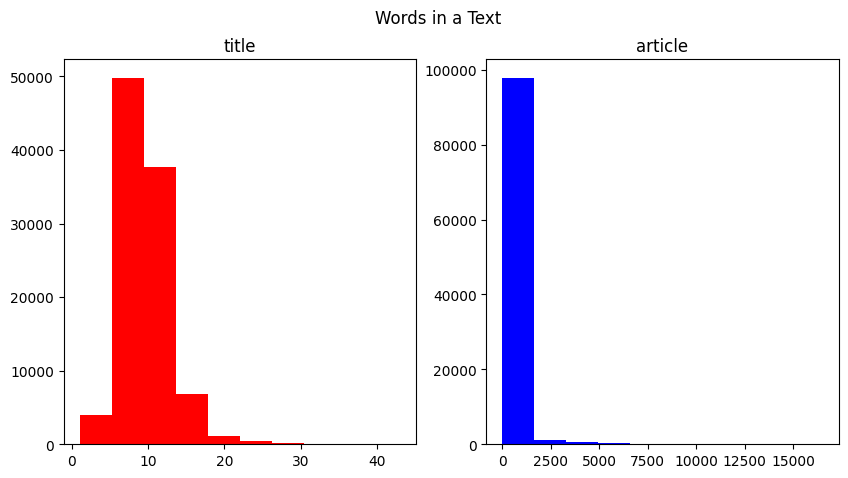

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

title_len=train_news_raw.sample(100000)['title'].str.split().map(len)
ax1.hist(title_len, color='red')
ax1.set_title('title')

title_len=train_news_raw.sample(100000)['article'].str.split().map(len)
ax2.hist(title_len, color='blue')
ax2.set_title('article')

fig.suptitle('Words in a Text')
plt.show()

In [7]:
train_news_raw.to_csv('../data/external/concatenated/train_news_raw.csv', index=False)